In [62]:
# Import the necessary libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


In [63]:
# Load a CSV file into a Pandas DataFrame
df = pd.read_csv("datos_limpios_Empresas.csv")

In [64]:
df

,NIT,RAZÓN_SOCIAL,SUPERVISOR,DEPARTAMENTO_DOMICILIO,CIUDAD_DOMICILIO,MACROSECTOR,INGRESOS_OPERACIONALES,GANANCIA_PÉRDIDA,TOTAL_ACTIVOS,TOTAL_PASIVOS,TOTAL_PATRIMONIO
0,899999068,ECOPETROL S.A,SUPERFINANCIERA,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,MINERO,144.82,33.41,216.85,125.81,91.03
1,900112515,REFINERIA DE CARTAGENA S.A.S,SUPERSOCIEDADES,BOLIVAR,CARTAGENA-BOLIVAR,MANUFACTURA,27.86,2.19,42.84,16.48,26.36
2,830095213,ORGANIZACIÓN TERPEL S.A.,SUPERFINANCIERA,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,COMERCIO,23.60,0.33,7.48,4.47,3.01
3,860069804,CARBONES DEL CERREJON LIMITED,SUPERSOCIEDADES,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,MINERO,16.39,6.05,10.45,9.00,1.45
4,800021308,DRUMMOND LTD,SUPERSOCIEDADES,BOGOTA D.C.,BOGOTA D.C.-BOGOTA D.C.,MINERO,15.27,2.16,14.27,6.34,7.93
...,...,...,...,...,...,...,...,...,...,...,...
29993,800215707,SERVICIOS Y PROCESOS SERPRO SAS,SUPERSOCIEDADES,BOGOTA D.C.,"BOGOTA, D.C.-BOGOTA D.C.",COMERCIO,0.02,0.00,0.01,0.01,0.01
29994,900895431,TEMPORAL ACTIVA S.A.S,SUPERSOCIEDADES,SANTANDER,FLORIDABLANCA-SANTANDER-SANTANDER,SERVICIOS,0.02,0.00,0.01,0.00,0.01
29995,900208659,DAMIS S.A.S,SUPERSOCIEDADES,VALLE,YUMBO-VALLE-VALLE,MANUFACTURA,0.02,0.00,0.02,0.01,0.01
29996,901097082,DISTRIBUCIONES NUEVO HORIZONTE DEL CASANARE S....,SUPERSOCIEDADES,CASANARE,YOPAL-CASANARE-CASANARE,COMERCIO,0.02,0.00,0.00,0.00,0.00


In [65]:
# Return a tuple representing the dimensionality of the DataFrame.
# First value  = Number of Rows including the header.
# Second value = Number of Columns.
df.shape


(29998, 11)

In [66]:
# Get the table for the column ARMAS_MEDIOS and GENERO
df.groupby('DEPARTAMENTO_DOMICILIO')['INGRESOS_OPERACIONALES'].sum().reset_index()

,DEPARTAMENTO_DOMICILIO,INGRESOS_OPERACIONALES
0,AMAZONAS,0.37
1,ANTIOQUIA,813.54
2,ARAUCA,2.30
3,ATLANTICO,223.28
4,BOGOTA D.C.,2691.62
5,BOLIVAR,193.98
6,BOYACA,15.40
7,CALDAS,42.29
8,CAQUETA,2.66
9,CASANARE,4.57


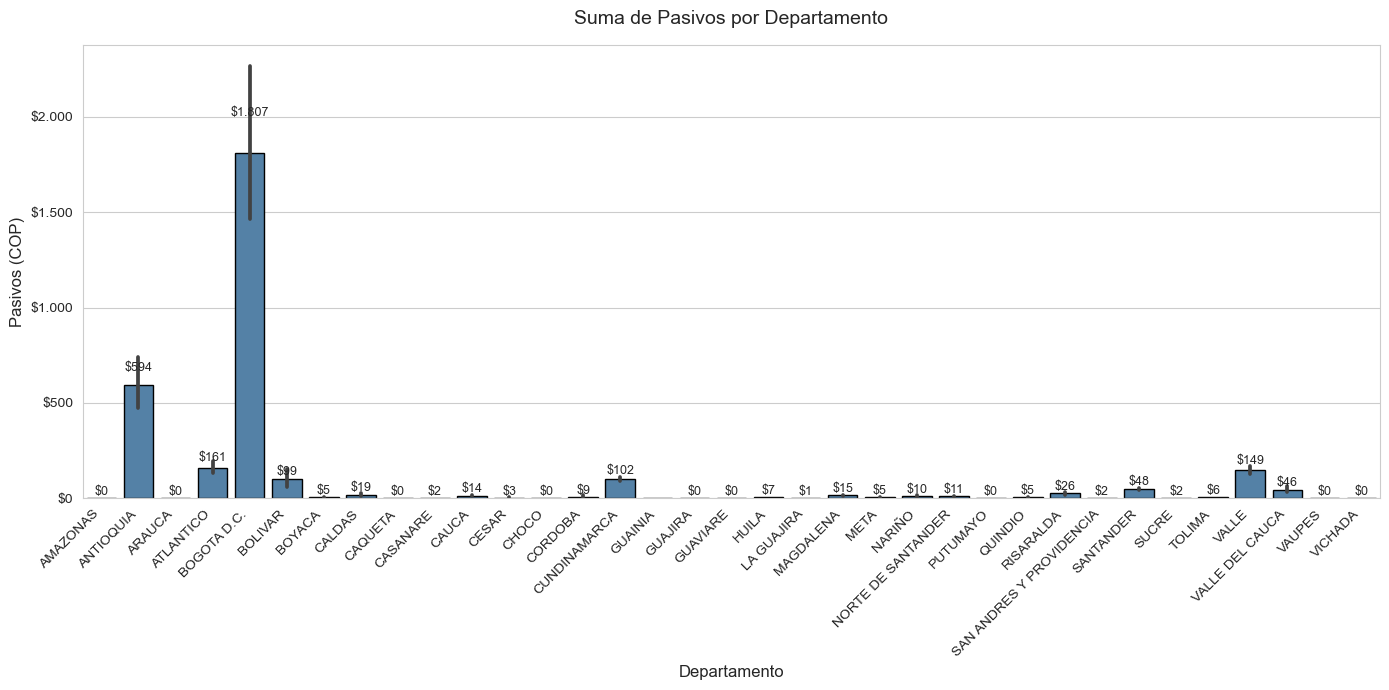

In [67]:
# Limpiar datos: Asegurarse de que TOTAL_PASIVOS sea numérico y manejar nulos
df['TOTAL_PASIVOS'] = pd.to_numeric(df['TOTAL_PASIVOS'], errors='coerce')
df = df.dropna(subset=['TOTAL_PASIVOS', 'DEPARTAMENTO_DOMICILIO'])

# Ordenar los departamentos por suma de DEPARTAMENTO_DOMICILIO (de mayor a menor)
suma_por_departamento = df.groupby('DEPARTAMENTO_DOMICILIO')['TOTAL_PASIVOS'].sum().reset_index()
suma_por_departamento = suma_por_departamento.sort_values('DEPARTAMENTO_DOMICILIO', ascending=True)
df = df.merge(suma_por_departamento[['DEPARTAMENTO_DOMICILIO']], on='DEPARTAMENTO_DOMICILIO', how='left')

# Configurar el estilo de Seaborn para un look más limpio
sns.set_style("whitegrid")

# Crear una figura con tamaño adecuado
plt.figure(figsize=(14, 7))

# Crear el gráfico de barras con Seaborn
barplot = sns.barplot(
    data=df,
    x="DEPARTAMENTO_DOMICILIO",
    y="TOTAL_PASIVOS",
    estimator=sum,
    order=suma_por_departamento['DEPARTAMENTO_DOMICILIO'],  # Ordenar barras
    color='steelblue',  # Color más profesional
    edgecolor='black'   # Bordes para mejor definición
)

formatter = FuncFormatter(lambda x, pos: f'${int(x):,}'.replace(',', '.'))
# Rotar etiquetas del eje X para evitar superposición
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.gca().yaxis.set_major_formatter(formatter)

# Añadir etiquetas de valores encima de las barras
for p in barplot.patches:
    height = p.get_height()
    if height > 0:  # Mostrar solo si la suma no es cero
        barplot.text(
            p.get_x() + p.get_width() / 2,  # Centro de la barra
            height + height * 0.1,        # Ligeramente por encima
            f'${int(height):,}'.replace(',', '.'),  # Valor con formato
            ha='center', va='bottom', fontsize=9
        )

# Añadir título y etiquetas
plt.title('Suma de Pasivos por Departamento', fontsize=14, pad=15)
plt.xlabel('Departamento', fontsize=12)
plt.ylabel('Pasivos (COP)', fontsize=12)

# Ajustar el diseño para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [68]:
# Get the table for the column MACROSECTOR and PASIVOS
df.groupby('MACROSECTOR')['TOTAL_PASIVOS'].sum().reset_index()


,MACROSECTOR,TOTAL_PASIVOS
0,AGROPECUARIO,48.84
1,COMERCIO,535.38
2,CONSTRUCCIÓN,272.18
3,MANUFACTURA,554.90
4,MINERO,520.40
5,SERVICIOS,1230.50


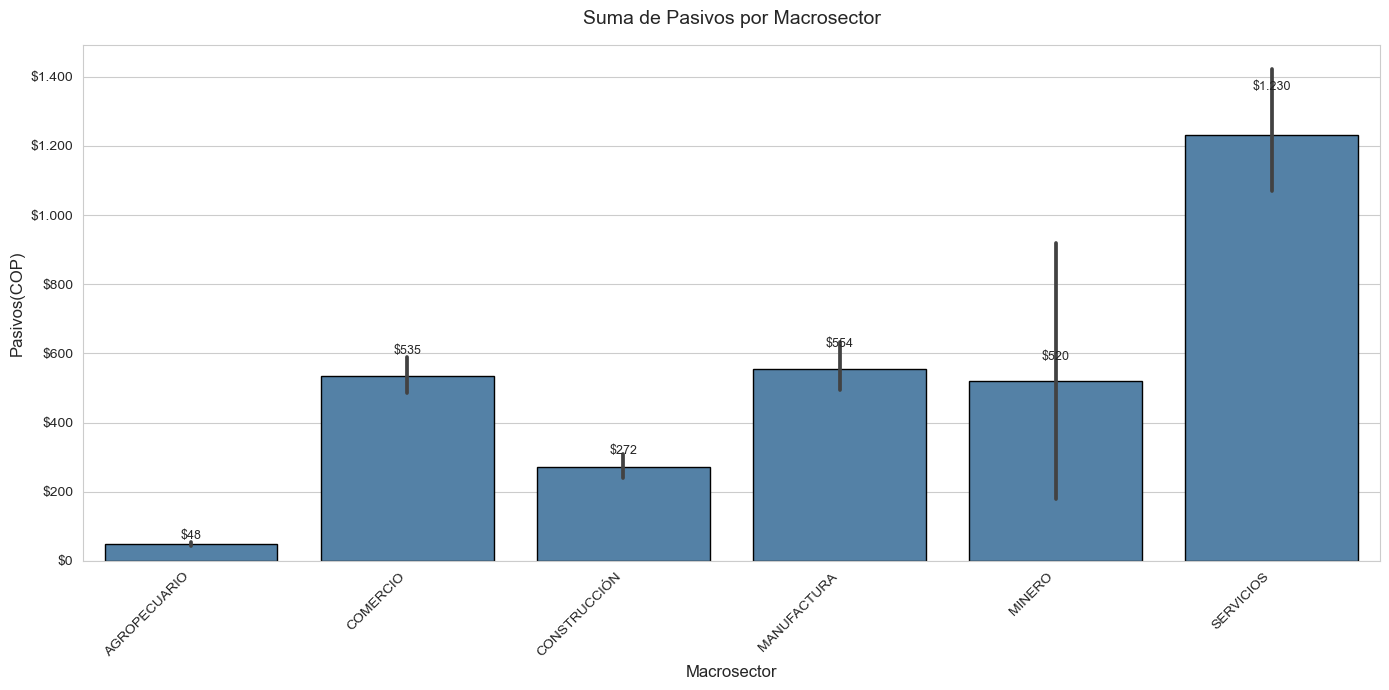

In [69]:

# Limpiar datos: Asegurarse de que TOTAL_PASIVOS sea numérico y manejar nulos
df['TOTAL_PASIVOS'] = pd.to_numeric(df['TOTAL_PASIVOS'], errors='coerce')
df = df.dropna(subset=['TOTAL_PASIVOS', 'MACROSECTOR'])

# Ordenar los departamentos por suma de MACROSECTOR (de mayor a menor)
suma_por_departamento = df.groupby('MACROSECTOR')['TOTAL_PASIVOS'].sum().reset_index()
suma_por_departamento = suma_por_departamento.sort_values('MACROSECTOR', ascending=True)
df = df.merge(suma_por_departamento[['MACROSECTOR']], on='MACROSECTOR', how='left')

# Configurar el estilo de Seaborn para un look más limpio
sns.set_style("whitegrid")

# Crear una figura con tamaño adecuado
plt.figure(figsize=(14, 7))

# Crear el gráfico de barras con Seaborn
barplot = sns.barplot(
    data=df,
    x="MACROSECTOR",
    y="TOTAL_PASIVOS",
    estimator=sum,
    order=suma_por_departamento['MACROSECTOR'],  # Ordenar barras
    color='steelblue',  # Color más profesional
    edgecolor='black'   # Bordes para mejor definición
)

formatter = FuncFormatter(lambda x, pos: f'${int(x):,}'.replace(',', '.'))
# Rotar etiquetas del eje X para evitar superposición
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.gca().yaxis.set_major_formatter(formatter)

# Añadir etiquetas de valores encima de las barras
for p in barplot.patches:
    height = p.get_height()
    if height > 0:  # Mostrar solo si la suma no es cero
        barplot.text(
            p.get_x() + p.get_width() / 2,  # Centro de la barra
            height + height * 0.1,        # Ligeramente por encima
            f'${int(height):,}'.replace(',', '.'),  # Valor con formato
            ha='center', va='bottom', fontsize=9
        )

# Añadir título y etiquetas
plt.title('Suma de Pasivos por Macrosector', fontsize=14, pad=15)
plt.xlabel('Macrosector', fontsize=12)
plt.ylabel('Pasivos(COP)', fontsize=12)

# Ajustar el diseño para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [72]:
# Get the table for the column DEPARTAMENTO and ACTIVOS
df.groupby('DEPARTAMENTO_DOMICILIO')['TOTAL_ACTIVOS'].sum().reset_index()

,DEPARTAMENTO_DOMICILIO,TOTAL_ACTIVOS
0,AMAZONAS,0.39
1,ANTIOQUIA,1296.09
2,ARAUCA,1.95
3,ATLANTICO,289.11
4,BOGOTA D.C.,3503.66
5,BOLIVAR,234.07
6,BOYACA,14.08
7,CALDAS,36.54
8,CAQUETA,1.49
9,CASANARE,4.01


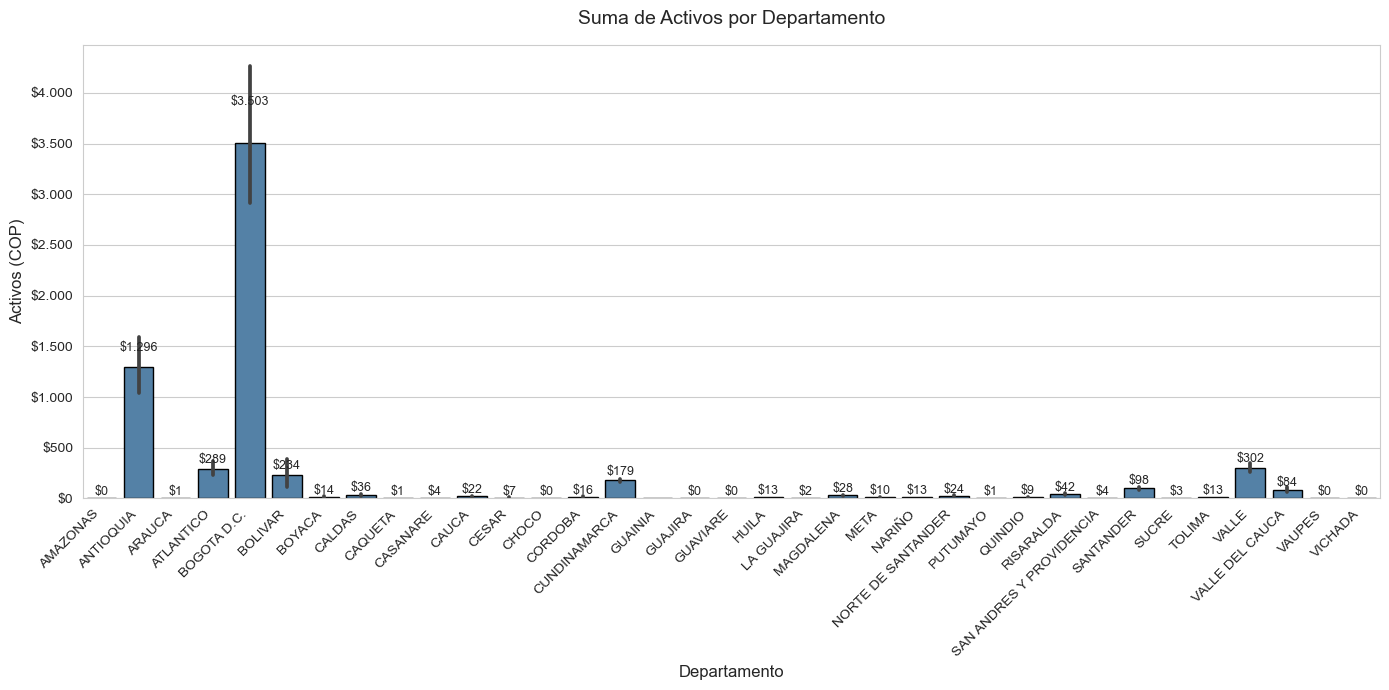

In [73]:
# Limpiar datos: Asegurarse de que TOTAL_ACTIVOS sea numérico y manejar nulos
df['ITOTAL_ACTIVOS'] = pd.to_numeric(df['TOTAL_ACTIVOS'], errors='coerce')
df = df.dropna(subset=['TOTAL_ACTIVOS', 'DEPARTAMENTO_DOMICILIO'])

# Ordenar los departamentos por suma de DEPARTAMENTO_DOMICILIO (de mayor a menor)
suma_por_departamento = df.groupby('DEPARTAMENTO_DOMICILIO')['TOTAL_ACTIVOS'].sum().reset_index()
suma_por_departamento = suma_por_departamento.sort_values('DEPARTAMENTO_DOMICILIO', ascending=True)
df = df.merge(suma_por_departamento[['DEPARTAMENTO_DOMICILIO']], on='DEPARTAMENTO_DOMICILIO', how='left')

# Configurar el estilo de Seaborn para un look más limpio
sns.set_style("whitegrid")

# Crear una figura con tamaño adecuado
plt.figure(figsize=(14, 7))

# Crear el gráfico de barras con Seaborn
barplot = sns.barplot(
    data=df,
    x="DEPARTAMENTO_DOMICILIO",
    y="TOTAL_ACTIVOS",
    estimator=sum,
    order=suma_por_departamento['DEPARTAMENTO_DOMICILIO'],  # Ordenar barras
    color='steelblue',  # Color más profesional
    edgecolor='black'   # Bordes para mejor definición
)

formatter = FuncFormatter(lambda x, pos: f'${int(x):,}'.replace(',', '.'))
# Rotar etiquetas del eje X para evitar superposición
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.gca().yaxis.set_major_formatter(formatter)

# Añadir etiquetas de valores encima de las barras
for p in barplot.patches:
    height = p.get_height()
    if height > 0:  # Mostrar solo si la suma no es cero
        barplot.text(
            p.get_x() + p.get_width() / 2,  # Centro de la barra
            height + height * 0.1,        # Ligeramente por encima
            f'${int(height):,}'.replace(',', '.'),  # Valor con formato
            ha='center', va='bottom', fontsize=9
        )

# Añadir título y etiquetas
plt.title('Suma de Activos por Departamento', fontsize=14, pad=15)
plt.xlabel('Departamento', fontsize=12)
plt.ylabel('Activos (COP)', fontsize=12)

# Ajustar el diseño para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [74]:
# Get the table for the column MACROSECTOR and ACTIVOS
df.groupby('MACROSECTOR')['TOTAL_ACTIVOS'].sum().reset_index()

,MACROSECTOR,TOTAL_ACTIVOS
0,AGROPECUARIO,109.24
1,COMERCIO,929.43
2,CONSTRUCCIÓN,429.58
3,MANUFACTURA,1120.64
4,MINERO,962.02
5,SERVICIOS,2713.17


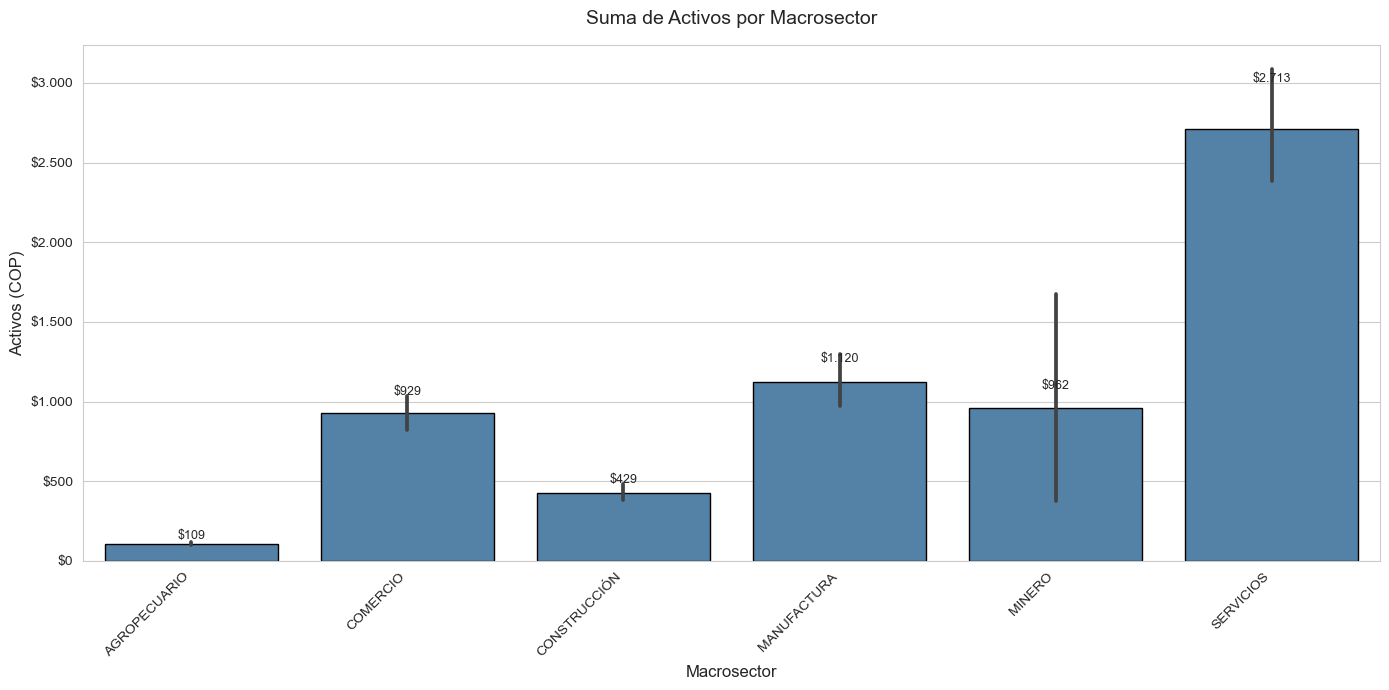

In [75]:
# Limpiar datos: Asegurarse de que TOTAL_ACTIVOS sea numérico y manejar nulos
df['ITOTAL_ACTIVOS'] = pd.to_numeric(df['TOTAL_ACTIVOS'], errors='coerce')
df = df.dropna(subset=['TOTAL_ACTIVOS', 'MACROSECTOR'])

# Ordenar los departamentos por suma de MACROSECTOR (de mayor a menor)
suma_por_departamento = df.groupby('MACROSECTOR')['TOTAL_ACTIVOS'].sum().reset_index()
suma_por_departamento = suma_por_departamento.sort_values('MACROSECTOR', ascending=True)
df = df.merge(suma_por_departamento[['MACROSECTOR']], on='MACROSECTOR', how='left')

# Configurar el estilo de Seaborn para un look más limpio
sns.set_style("whitegrid")

# Crear una figura con tamaño adecuado
plt.figure(figsize=(14, 7))

# Crear el gráfico de barras con Seaborn
barplot = sns.barplot(
    data=df,
    x="MACROSECTOR",
    y="TOTAL_ACTIVOS",
    estimator=sum,
    order=suma_por_departamento['MACROSECTOR'],  # Ordenar barras
    color='steelblue',  # Color más profesional
    edgecolor='black'   # Bordes para mejor definición
)

formatter = FuncFormatter(lambda x, pos: f'${int(x):,}'.replace(',', '.'))
# Rotar etiquetas del eje X para evitar superposición
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.gca().yaxis.set_major_formatter(formatter)

# Añadir etiquetas de valores encima de las barras
for p in barplot.patches:
    height = p.get_height()
    if height > 0:  # Mostrar solo si la suma no es cero
        barplot.text(
            p.get_x() + p.get_width() / 2,  # Centro de la barra
            height + height * 0.1,        # Ligeramente por encima
            f'${int(height):,}'.replace(',', '.'),  # Valor con formato
            ha='center', va='bottom', fontsize=9
        )

# Añadir título y etiquetas
plt.title('Suma de Activos por Macrosector', fontsize=14, pad=15)
plt.xlabel('Macrosector', fontsize=12)
plt.ylabel('Activos (COP)', fontsize=12)

# Ajustar el diseño para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()